##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [27]:
import pathlib
import textwrap
from google.colab import userdata

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [2]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

Note that depending on where you are located, you might have to [enable billing](https://ai.google.dev/gemini-api/docs/billing#enable-cloud-billing) since the free tier is not available in [EEA (including EU), the UK, and CH](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GEMINI_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GEMINI_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [29]:
# Or use `os.getenv('GEMINI_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GEMINI_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important. This should be your go-to model.
* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model

In [30]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Flash models is 15 requests per minute (RPM) for free ([in supported countries](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

Always start with the 'gemini-1.5-flash' model. It should be sufficient for most of your tasks:

In [36]:
model = genai.GenerativeModel("gemini-2.0-flash-exp")

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. At the moment, the available models support text, images and videos as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/generate-content#v1beta.models.generateContent"><code>GenerativeModel.generate_content</code></a> method:

In [37]:
%%time
response = model.generate_content("Quel est le sens de la vie ?")

CPU times: user 114 ms, sys: 14.3 ms, total: 128 ms
Wall time: 9.54 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [38]:
to_markdown(response.text)

> Ah, la question existentielle par excellence ! "Quel est le sens de la vie ?" C'est une question que l'humanité se pose depuis des millénaires, et il n'y a pas de réponse unique ou universellement acceptée. En fait, c'est un peu le but : **la réponse est personnelle et évolue avec nous.**
> 
> Voici quelques pistes pour aborder cette question complexe :
> 
> **1. L'Absurdité et le Sens que l'on Crée:**
> 
> * **L'absurdité existentialiste:** Certains philosophes, comme Albert Camus, ont exploré l'idée que la vie elle-même est fondamentalement dépourvue de sens inhérent. L'univers ne nous donne pas de mode d'emploi. Cela peut sembler pessimiste, mais cela ouvre aussi la porte à une grande liberté.
> * **Créer son propre sens:** Dans cette optique, c'est à nous de construire notre propre sens, nos propres valeurs et nos propres buts. Cela peut passer par l'amour, la créativité, la connaissance, l'engagement, l'aide aux autres, la recherche de la beauté, etc. Le sens n'est pas à trouver, mais à créer.
> 
> **2. Perspectives Philosophiques et Spirituelles:**
> 
> * **Le bonheur et l'épanouissement:** Pour certains, le sens de la vie est de rechercher le bonheur, l'épanouissement personnel et la satisfaction. Cela peut passer par des relations significatives, l'accomplissement de soi, ou la contribution à la société.
> * **Le dépassement de soi:** D'autres estiment que le sens est dans la quête constante de s'améliorer, d'apprendre, d'évoluer, de se dépasser.
> * **La spiritualité et la connexion:** La religion ou la spiritualité offrent souvent des cadres de sens, en se basant sur des croyances en un être supérieur, un but divin, ou une interconnexion avec le cosmos.
> * **Le stoïcisme:** Cette philosophie antique met l'accent sur la vertu, la raison et l'acceptation de ce qui ne dépend pas de nous. Le sens de la vie serait de vivre en accord avec la nature et d'accepter la mortalité.
> * **L'hédonisme:** À l'opposé, cette approche met en avant la recherche du plaisir et l'évitement de la souffrance comme objectif principal.
> 
> **3. Perspectives Psychologiques:**
> 
> * **La psychologie positive:** Cette approche se concentre sur les forces et les qualités humaines, la recherche de sens et la satisfaction dans la vie.
> * **Les besoins fondamentaux:** Selon la pyramide de Maslow, la satisfaction des besoins fondamentaux (physiologiques, sécurité, appartenance, estime) est un prérequis pour pouvoir se consacrer à des besoins plus élevés comme l'accomplissement de soi.
> * **Les valeurs personnelles:** Identifier et vivre en accord avec ses propres valeurs est essentiel pour se sentir aligné et donner un sens à sa vie.
> 
> **4. Perspectives Biologiques et Scientifiques:**
> 
> * **La reproduction et la survie:** Du point de vue biologique, le sens de la vie est souvent ramené à la reproduction et la transmission des gènes.
> * **L'évolution et l'adaptation:** Notre existence est le résultat d'un long processus d'évolution.
> * **La compréhension du monde:** La science et la recherche visent à comprendre le monde qui nous entoure, notre place dans l'univers, et cela peut être une source de sens pour certains.
> 
> **En Conclusion :**
> 
> * **Il n'y a pas de réponse universelle:** Le sens de la vie est une question profondément personnelle.
> * **C'est un voyage, pas une destination:** La recherche de sens est un processus continu, qui évolue avec nos expériences.
> * **Soyez curieux et explorez:** N'hésitez pas à lire, à réfléchir, à échanger avec d'autres, et à expérimenter pour trouver ce qui résonne en vous.
> * **Le sens n'est pas forcément grand ou spectaculaire:** Il peut se trouver dans les petites choses du quotidien, dans les relations avec les autres, ou dans la simple appréciation de l'instant présent.
> 
> Au lieu de chercher "LE" sens de la vie, peut-être faudrait-il chercher "VOTRE" sens de la vie. Prenez le temps de vous poser cette question, d'explorer différentes pistes et de construire votre propre réponse. C'est un voyage passionnant et personnel qui vaut la peine d'être entrepris.
> 
> Alors, qu'en pensez-vous ? Quelles sont vos pistes de réflexion sur le sens de la vie ?


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/generativeai/protos/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [39]:
response.candidates

[content {
  parts {
    text: "Ah, la question existentielle par excellence ! \"Quel est le sens de la vie ?\" C\'est une question que l\'humanité se pose depuis des millénaires, et il n\'y a pas de réponse unique ou universellement acceptée. En fait, c\'est un peu le but : **la réponse est personnelle et évolue avec nous.**\n\nVoici quelques pistes pour aborder cette question complexe :\n\n**1. L\'Absurdité et le Sens que l\'on Crée:**\n\n* **L\'absurdité existentialiste:** Certains philosophes, comme Albert Camus, ont exploré l\'idée que la vie elle-même est fondamentalement dépourvue de sens inhérent. L\'univers ne nous donne pas de mode d\'emploi. Cela peut sembler pessimiste, mais cela ouvre aussi la porte à une grande liberté.\n* **Créer son propre sens:** Dans cette optique, c\'est à nous de construire notre propre sens, nos propres valeurs et nos propres buts. Cela peut passer par l\'amour, la créativité, la connaissance, l\'engagement, l\'aide aux autres, la recherche de la b

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [40]:
%%time
response = model.generate_content("Quel est le sens de la vie ?", stream=True)

CPU times: user 109 ms, sys: 10.2 ms, total: 119 ms
Wall time: 8.46 s


In [41]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

Ah
________________________________________________________________________________
, la question à un million de dollars ! "Quel est le sens de la
________________________________________________________________________________
 vie ?" C'est une question que l'humanité se pose depuis des
________________________________________________________________________________
 siècles, et il n'y a pas de réponse unique ou universellement acceptée. C'est d'ailleurs ce qui la rend si fascinante
________________________________________________________________________________
.

Au lieu de chercher une réponse définitive, il est peut-être plus intéressant d'explorer les différentes perspectives et réflexions que cette question suscite :
________________________________________________________________________________


**1. Perspectives philosophiques et spirituelles :**

* **Nihilisme:** Certains pensent qu'il n'y a pas de sens inhérent à la vie. Nous existons par hasard dans
_____________________

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like <code>text</code> do not:

In [ ]:
try:
    response.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [52]:
!curl -o AboutElephant-Savanna.jpg https://elephantconservation.org/wp-content/uploads/2022/05/AboutElephant-Savanna.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k  100  120k    0     0   637k      0 --:--:-- --:--:-- --:--:--  636k


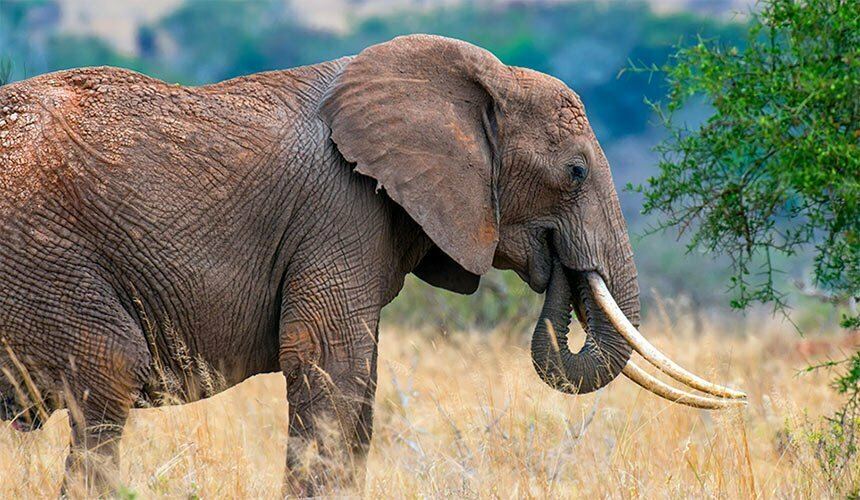

In [56]:
import PIL.Image

img = PIL.Image.open("AboutElephant-Savanna.jpg")
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [58]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [66]:
response = model.generate_content([img,"Décrire l'image en précisant l'orogine de l'animal en expliquant comment tu le sais"])

to_markdown(response.text)

> Voici une description de l'image :
> 
> L'image montre un éléphant d'Afrique adulte en gros plan, se tenant dans un champ d'herbe sèche. L'éléphant est de profil, sa tête tournée vers la droite du cadre. Ses défenses sont longues et incurvées, et son corps est ridé et grisâtre. L'arrière-plan est flou, mais on peut voir des arbres et des arbustes.
> 
> Je sais que c'est un éléphant d'Afrique en raison de plusieurs caractéristiques :
> 
> * **Défenses :** Les éléphants d'Afrique ont de grandes défenses, tandis que les éléphants d'Asie ont souvent des défenses plus petites ou qui manquent parfois.  Les défenses de l'éléphant de l'image sont grandes et proéminentes.
> * **Oreilles :** Les éléphants d'Afrique ont de grandes oreilles, souvent décrites comme ayant la forme de l'Afrique. Les oreilles de l'éléphant de l'image sont grandes et de forme caractéristique des oreilles d'éléphants africains.
> * **Tête :**  La forme de la tête est également plus caractéristique des éléphants d'Afrique.
> * **Contexte :** Le contexte suggère un environnement africain.
> 
> La combinaison de ces caractéristiques indique clairement qu'il s'agit d'un éléphant d'Afrique.


To provide both text and images in a prompt, pass a list containing the strings and images:

In [60]:
response = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.",
        img,
    ],
    stream=True,
)
response.resolve()

In [61]:
to_markdown(response.text)

> Here's a blog post based on the image of the elephant:
> 
> ##  Meal Prep Motivation: Even Elephants Do It!
> 
> This week's meal prep inspiration comes from an unexpected source: a majestic African elephant peacefully grazing in the savannah.  See that focused munching? That's dedication to sustenance!  And it got me thinking about my own journey with meal prepping.
> 
> For months, I was *that* person: grabbing whatever fast food was closest, skipping meals altogether, or resorting to unhealthy convenience food. My energy levels were a rollercoaster, and I felt sluggish and constantly battling hunger pangs.  The photo of this magnificent creature reminded me how essential proper nourishment is, even for the largest land animals!
> 
> Then, I decided to embark on my own meal prep adventure. It wasn't easy at first.  Finding time, figuring out what to make, and actually sticking to the plan proved challenging. But slowly, I started to see the benefits.
> 
> My current meal prep routine involves cooking a big batch of roasted chicken and sweet potatoes on Sunday. I pair it with a simple salad for lunch and use leftover chicken in quesadillas or stir-fries for quick, healthy dinners throughout the week.  It's not fancy, but it's consistent, and that's the key.
> 
> The rewards?  Increased energy, better mood, and a lot less stress about what to eat. I’ve even started experimenting with new recipes, which makes the process more fun. And let's be honest, that satisfied feeling of having a week's worth of healthy meals ready to go?  It’s incredibly liberating.
> 
> So, inspired by this elephant’s dedication to fueling its day, I encourage you to give meal prepping a try.  Even small steps can make a big difference. Start with one meal a week, experiment with simple recipes, and find what works best for *your* lifestyle.  Your future self – and your energy levels – will thank you.  What's your go-to meal prep dish? Share in the comments below!


## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(history=[])
chat

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/generate_text.md"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message(
    "In one sentence, explain how a computer works to a young child."
)
to_markdown(response.text)

> A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
response = chat.send_message(
    "Okay, how about a more detailed explanation to a high schooler?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

A computer works by following instructions, called a program, which tells it what to
________________________________________________________________________________
 do. These instructions are written in a special language that the computer can understand, and they are stored in the computer's memory. The computer's processor
________________________________________________________________________________
, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program's logic. The results of these calculations and decisions are then displayed on the computer's screen or stored in memory for later use.

To give you a simple analogy, imagine a computer as a
________________________________________________________________________________
 chef following a recipe. The recipe is like the program, and the chef's actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs act

[`genai.protos.Content`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Content.md) objects contain a list of [`genai.protos.Part`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Part.md) objects that each contain either a text (string) or inline_data ([`genai.protos.Blob`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Blob.md)), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `genai.protos.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer's memory. The computer's processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program's logic. The results of these calculations and decisions are then displayed on the computer's screen or stored in memory for later use.
> 
> To give you a simple analogy, imagine a computer as a chef following a recipe. The recipe is like the program, and the chef's actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs actions like gathering ingredients (fetching data from memory), mixing them together (performing calculations), and cooking them (processing data). The final dish (the output) is then presented on a plate (the computer screen).
> 
> In summary, a computer works by executing a series of instructions, stored in its memory, to perform calculations, make decisions, and display or store the results.

## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `genai.protos.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 501

## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED]")

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...")

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `genai.protos.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `genai.protos.Content` objects are the primary units of conversation in the API.

While the `genai.protos.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
response.candidates[0].content

parts {
  text: "A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer\'s memory. The computer\'s processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program\'s logic. The results of these calculations and decisions are then displayed on the computer\'s screen or stored in memory for later use.\n\nTo give you a simple analogy, imagine a computer as a chef following a recipe. The recipe is like the program, and the chef\'s actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs actions like gathering ingredients (fetching data from memory), mixing them together (performing calculations), and cooking them (processing data). The final dish (the output) is then presented on a plate (the computer screen

In [ ]:
result = genai.embed_content(
    model="models/text-embedding-004", content=response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED ...")

[-0.013921871, -0.03504407, -0.0051786783, 0.03113 ... TRIMMED ...


Similarly, the chat history contains a list of `genai.protos.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer\'s memory. The computer\'s processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program\'s logic. The results of these calculations and decisions are then displayed on the computer\'s screen or stored in memory for later use.\n\nTo give you a simple analogy, imagine a computer as a chef following a reci

In [ ]:
result = genai.embed_content(model="models/text-embedding-004", content=chat.history)

# 1 input > 1 vector output
for i, v in enumerate(result["embedding"]):
    print(str(v)[:50], "... TRIMMED...")

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.010979066, -0.024494737, 0.0092659835, 0.00803 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.013921871, -0.03504407, -0.0051786783, 0.03113 ... TRIMMED...


### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
response = model.generate_content("[Questionable prompt here]")
response.candidates

[content {
  parts {
    text: "I\'m sorry, but this prompt involves a sensitive topic and I\'m not allowed to generate responses that are potentially harmful or inappropriate."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
response = model.generate_content(
    "[Questionable prompt here]", safety_settings={"HARASSMENT": "block_none"}
)
response.text

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

The [`google.generativeai.protos`](https://ai.google.dev/api/python/google/generativeai/protos) submodule provides access to the low level classes used by the API behind the scenes:

The SDK attempts to convert your message to a `genai.protos.Content` object, which contains a list of `genai.protos.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`genai.protos.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    genai.protos.Content(
        parts=[
            genai.protos.Part(
                text="Write a short, engaging blog post based on this picture."
            ),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type="image/jpeg", data=pathlib.Path("image.jpg").read_bytes()
                )
            ),
        ],
    ),
    stream=True,
)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `genai.protos.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `genai.protos.Content` objects and it will be treated as multi-turn chat:

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

messages = [
    {
        "role": "user",
        "parts": ["Briefly explain how a computer works to a young child."],
    }
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer as a really smart friend who can help you with many things. Just like you have a brain to think and learn, a computer has a brain too, called a processor. It's like the boss of the computer, telling it what to do.
> 
> Inside the computer, there's a special place called memory, which is like a big storage box. It remembers all the things you tell it to do, like opening games or playing videos.
> 
> When you press buttons on the keyboard or click things on the screen with the mouse, you're sending messages to the computer. These messages travel through special wires, called cables, to the processor.
> 
> The processor reads the messages and tells the computer what to do. It can open programs, show you pictures, or even play music for you.
> 
> All the things you see on the screen are created by the graphics card, which is like a magic artist inside the computer. It takes the processor's instructions and turns them into colorful pictures and videos.
> 
> To save your favorite games, videos, or pictures, the computer uses a special storage space called a hard drive. It's like a giant library where the computer can keep all your precious things safe.
> 
> And when you want to connect to the internet to play games with friends or watch funny videos, the computer uses something called a network card to send and receive messages through the internet cables or Wi-Fi signals.
> 
> So, just like your brain helps you learn and play, the computer's processor, memory, graphics card, hard drive, and network card all work together to make your computer a super-smart friend that can help you do amazing things!

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
messages.append({"role": "model", "parts": [response.text]})

messages.append(
    {
        "role": "user",
        "parts": [
            "Okay, how about a more detailed explanation to a high school student?"
        ],
    }
)

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of several essential components that work together to process, store, and display information:
> 
> **1. Processor (CPU):**
>    - The brain of the computer.
>    - Executes instructions and performs calculations.
>    - Speed measured in gigahertz (GHz).
>    - More GHz generally means faster processing.
> 
> **2. Memory (RAM):**
>    - Temporary storage for data being processed.
>    - Holds instructions and data while the program is running.
>    - Measured in gigabytes (GB).
>    - More GB of RAM allows for more programs to run simultaneously.
> 
> **3. Storage (HDD/SSD):**
>    - Permanent storage for data.
>    - Stores operating system, programs, and user files.
>    - Measured in gigabytes (GB) or terabytes (TB).
>    - Hard disk drives (HDDs) are traditional, slower, and cheaper.
>    - Solid-state drives (SSDs) are newer, faster, and more expensive.
> 
> **4. Graphics Card (GPU):**
>    - Processes and displays images.
>    - Essential for gaming, video editing, and other graphics-intensive tasks.
>    - Measured in video RAM (VRAM) and clock speed.
> 
> **5. Motherboard:**
>    - Connects all the components.
>    - Provides power and communication pathways.
> 
> **6. Input/Output (I/O) Devices:**
>    - Allow the user to interact with the computer.
>    - Examples: keyboard, mouse, monitor, printer.
> 
> **7. Operating System (OS):**
>    - Software that manages the computer's resources.
>    - Provides a user interface and basic functionality.
>    - Examples: Windows, macOS, Linux.
> 
> When you run a program on your computer, the following happens:
> 
> 1. The program instructions are loaded from storage into memory.
> 2. The processor reads the instructions from memory and executes them one by one.
> 3. If the instruction involves calculations, the processor performs them using its arithmetic logic unit (ALU).
> 4. If the instruction involves data, the processor reads or writes to memory.
> 5. The results of the calculations or data manipulation are stored in memory.
> 6. If the program needs to display something on the screen, it sends the necessary data to the graphics card.
> 7. The graphics card processes the data and sends it to the monitor, which displays it.
> 
> This process continues until the program has completed its task or the user terminates it.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    "Tell me a story about a magic backpack.",
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0,
    ),
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += "..."

to_markdown(text)

> Once upon a time, in a small town nestled amidst lush green hills, lived a young girl named...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).